In [1]:
import numpy
import numpy as np
import matplotlib.pyplot as plt
from glob import glob


def show_img(data):
    plt.figure(figsize=(10, 10))
    plt.imshow(data, 'gray')

In [2]:
!ls -l static/data/binarisation/

total 5000
-rw-r--r--  1 sampathm  staff   13410 Mar  7 10:41 0002_011jp.jpg
-rw-r--r--  1 sampathm  staff   56095 Mar  7 10:41 0003_41815.jpg
-rw-r--r--  1 sampathm  staff   12611 Mar  7 10:41 0006_200px.jpg
-rw-r--r--  1 sampathm  staff   17157 Mar  7 10:42 0009_7c0ac.jpg
-rw-r--r--  1 sampathm  staff  197361 Mar  7 10:42 0010_2jfm8.jpg
-rw-r--r--  1 sampathm  staff   66007 Mar  7 10:41 0014_6a00e.jpg
-rw-r--r--  1 sampathm  staff   15000 Mar  7 10:42 0016_1d274.jpg
-rw-r--r--  1 sampathm  staff   18964 Mar  7 10:42 0017_348s_.jpg
-rw-r--r--  1 sampathm  staff  852176 Mar  7 10:41 0018_130_0.jpg
-rw-r--r--  1 sampathm  staff   35042 Mar  7 10:42 0019_5f70b.jpg
-rw-r--r--  1 sampathm  staff   33100 Mar  7 10:42 0020_1a349.jpg
-rw-r--r--  1 sampathm  staff   23802 Mar  7 10:41 0021_01122.jpg
-rw-r--r--  1 sampathm  staff   48640 Mar  7 10:42 0022_199ph.jpg
-rw-r--r--  1 sampathm  staff   26157 Mar  7 10:41 0023_711_c.jpg
-rw-r--r--  1 sampathm  staff   55451 Mar  7 10:42 0025_249lo.jpg

In [3]:
sample_images = glob('static/data/binarisation/*')[:5]

sample_images

['static/data/binarisation/0002_011jp.jpg',
 'static/data/binarisation/0003_41815.jpg',
 'static/data/binarisation/0006_200px.jpg',
 'static/data/binarisation/0026_9ce02.jpg',
 'static/data/binarisation/0023_711_c.jpg']

In [4]:
sample_images_data = [plt.imread(_) for _ in sample_images]

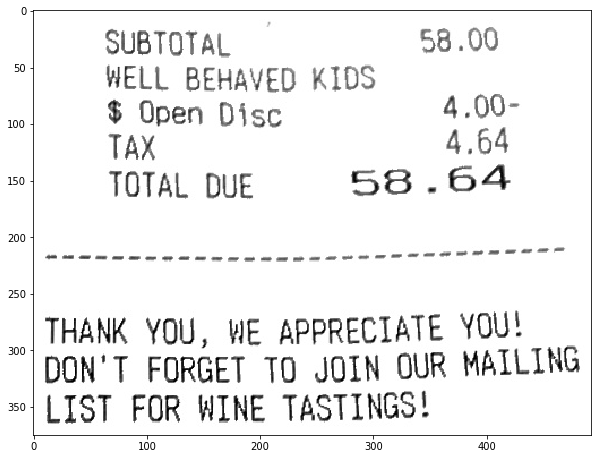

In [128]:
sample_images_data = [plt.imread(_) for _ in sample_images]
image = sample_images_data[3]
# image = plt.imread('/Users/sampathm/devbox/vitaFlow/vitaflow/annotate_server/static/data/binarisation/0014_6a00e.jpg')
show_img(image)

In [129]:
image.shape

(375, 493)

343


array([255, 255, 255, 255, 255, 255, 255, 255, 247, 244, 142,  85, 111,
       105,  91,  94,  80,  96, 106, 100, 112, 234, 247, 194,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0, 171, 250, 248, 245, 244,
       244, 246,  71,  93, 249, 250, 253, 251, 251, 251, 237, 205,  46,
        24,   0,   1,   0,   0,   8,  11,   0,   1,   0, 166, 214,  40,
         4,   4,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,  52,  34,   1,   4,   0,  29,  21,  11,   1,   0,   0,   0,
         0,   1,   0,   0,   0,  15,  82,  66,  78,  77,  69,  69,  73,
        69,  46,   7,   8,   0,   0,   3,   0,   0,   0,   0,   0,   0,
         0,  13,   0,   1,   2,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   5,   9,
        21,  11,   0,   0,   0,   0,   7,   6,   0,   0,   3,   0,   4,
         0,   7,   9,  13,   6,   5,   0,   9,   0,   0,  23,   

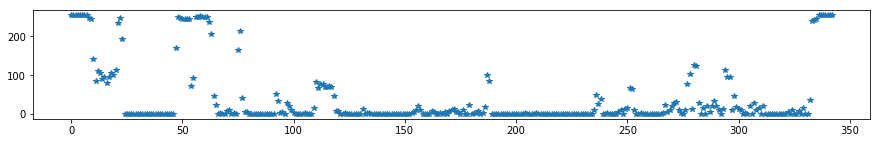

In [144]:
plt_data = image.min(axis=1)
plt.figure(figsize=(15, 2))
plt.plot(range(len(plt_data)), plt_data,  '*')

plt_data.astype(int)

In [145]:
def get_line_segments(image):
    # threshold
    image = (image * 1.0) / image.max()
    THRESHOLD_LIMIT = 0.40
    image[image <= THRESHOLD_LIMIT] = 0.0
    image[image > THRESHOLD_LIMIT] = 1.0
    
    plt_data = image.min(axis=1)
    plt.figure(figsize=(15, 2))
    plt.plot(range(len(plt_data)), plt_data,  '*')
    
    plt_data_index = np.arange(len(plt_data))
    data = plt_data_index[plt_data == 0]
    i = 0
    start = i
    memory = data[i]

    line_segments = []

    while i < len(data) - 1:
        i += 1
        if data[i] == memory + 1:
            memory += 1
        else:
            line_segments.append(
                (data[start], data[i])
            )
            # print(data[start], data[i])
            start = i
            memory = data[i]

    return line_segments
        




In [146]:
len(sample_images)

5

In [149]:
sample_images

['static/data/binarisation/0002_011jp.jpg',
 'static/data/binarisation/0003_41815.jpg',
 'static/data/binarisation/0006_200px.jpg',
 'static/data/binarisation/0026_9ce02.jpg',
 'static/data/binarisation/0023_711_c.jpg']

In [151]:
sample_images_data = [plt.imread(_) for _ in sample_images]

[]
[(106, 148), (148, 186), (186, 232), (232, 311), (311, 390), (390, 695), (695, 726), (726, 765), (765, 807), (807, 849), (849, 890), (890, 931), (931, 1014), (1014, 1058), (1058, 1137), (1137, 1178), (1178, 1219)]
[(11, 105), (105, 115), (115, 122), (122, 130), (130, 139)]
[(18, 49), (49, 75), (75, 105), (105, 137), (137, 211), (211, 266), (266, 336)]
[(11, 14), (14, 19), (19, 24), (24, 54), (54, 64), (64, 77), (77, 279), (279, 282), (282, 295)]


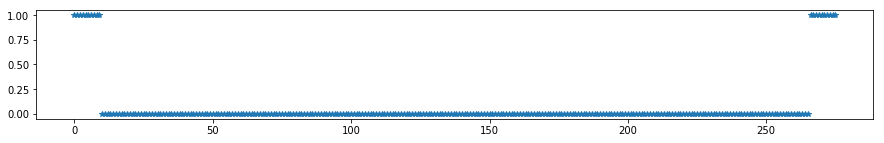

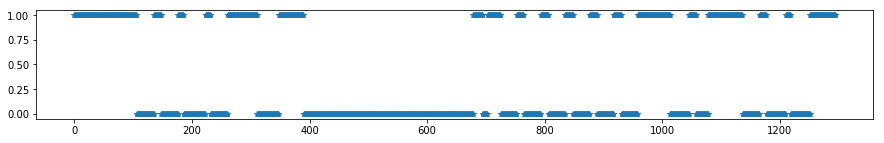

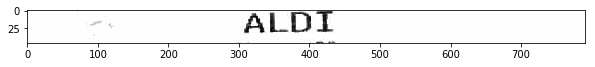

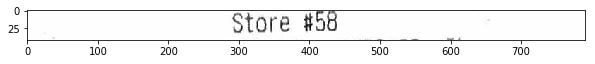

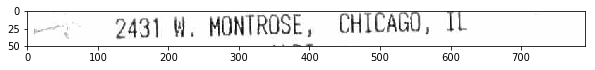

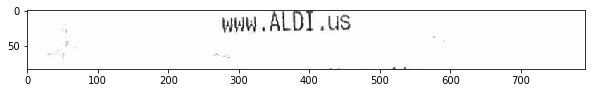

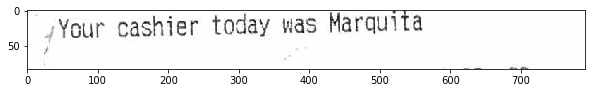

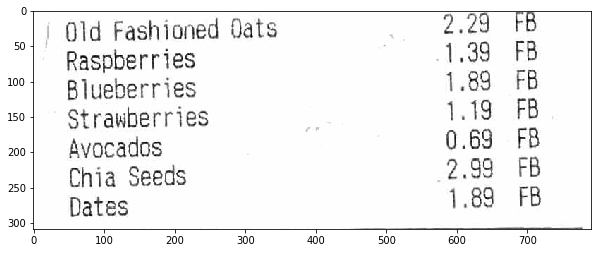

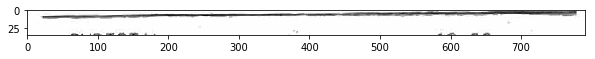

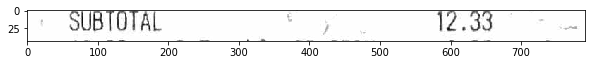

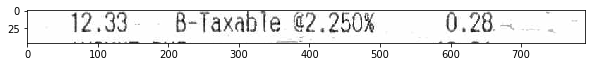

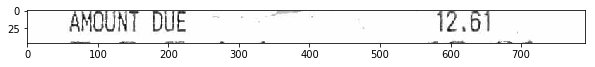

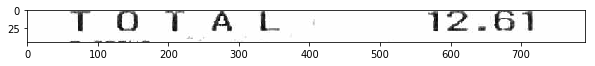

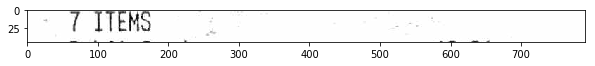

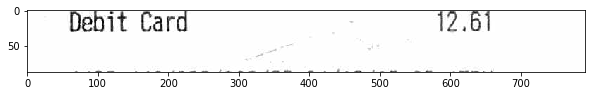

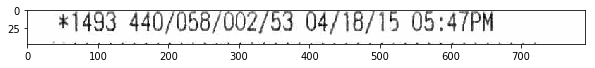

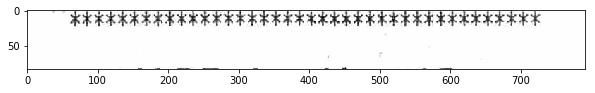

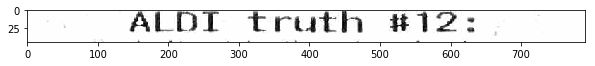

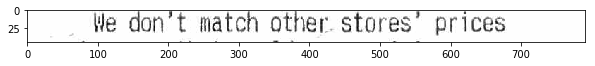

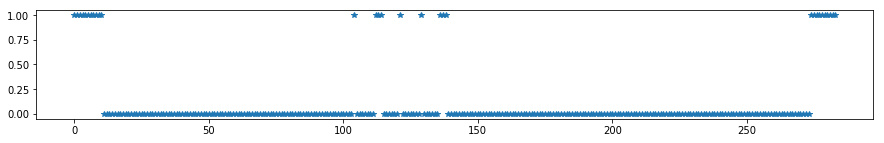

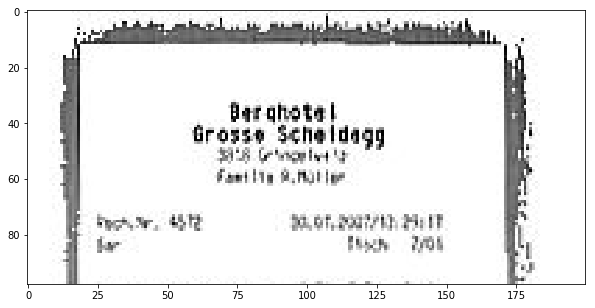

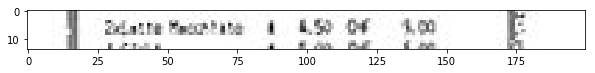

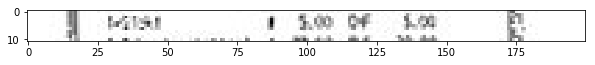

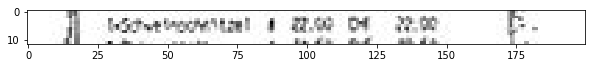

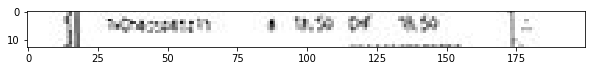

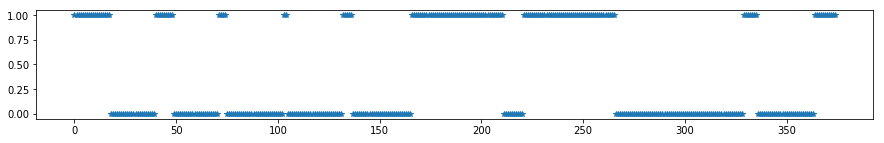

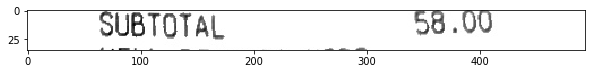

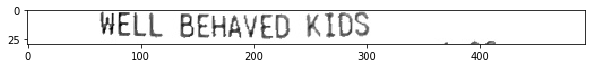

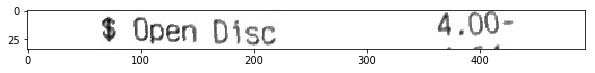

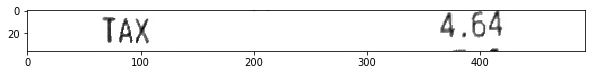

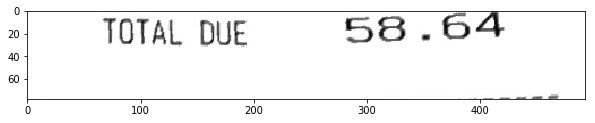

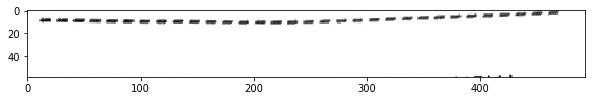

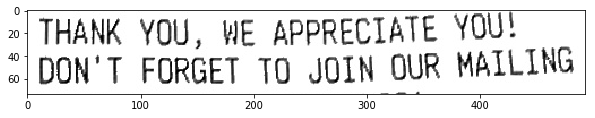

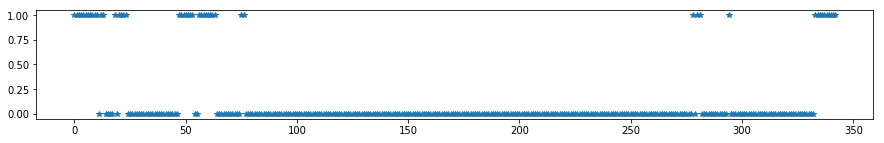

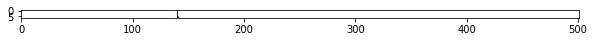

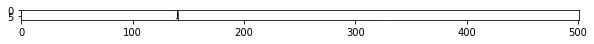

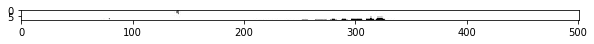

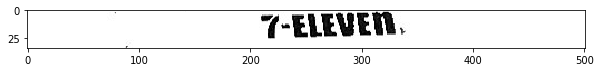

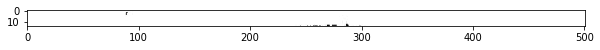

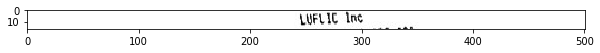

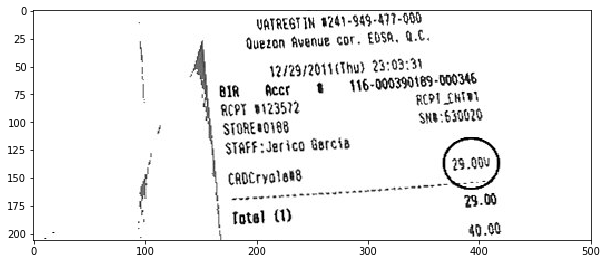

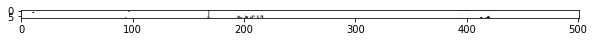

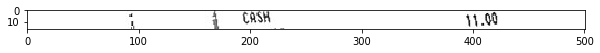

In [152]:
for image in sample_images_data:
    line_segments = get_line_segments(image)
    for start, end in line_segments:
        show_img(image[start - 2: end + 2, :])
    print(line_segments)
    sleep(0.1)